In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# Set a new working directory
new_path = '../'
os.chdir(new_path)
# pip install -e .
# from morphomics 


In [3]:
from morphomics import pipeline
params = {}
params['Input'] = {'data_location_filepath': "test_subsampler",
                   'extension': 'corrected.swc',
                   'conditions': ['Region', 'Model', 'Sex', 'Animal'],
                   'separated_by': None,
                   'morphoframe_name': 'sub',
                   'save_data': False,
                   'save_folderpath': 0,
                   'save_filename': 0}

my_pip = pipeline.Pipeline(parameters = params, Parameters_ID='subsampler')

This will be the file prefix: Morphomics.PID_subsampler



In [4]:
my_pip.Input()

Loading the data from test_subsampler
You are now collecting the 3D reconstructions (.swc files) from this folder: 
test_subsampler

Found 1182 files...
Sample filenames:
test_subsampler/S1/2xKXA/F/BL6_2xKXA_F_WFA488_IBA568_CD68647_S1_3/Filament_001_Filaments_1_Trace_0010_nl_corrected.swc
test_subsampler/S1/2xKXA/F/BL6_2xKXA_F_WFA488_IBA568_CD68647_S1_3/Filament_001_Filaments_1_Trace_0031_nl_corrected.swc
test_subsampler/S1/2xKXA/F/BL6_2xKXA_F_WFA488_IBA568_CD68647_S1_3/Filament_001_Filaments_1_Trace_0025_nl_corrected.swc
test_subsampler/S1/2xKXA/F/BL6_2xKXA_F_WFA488_IBA568_CD68647_S1_3/Filament_001_Filaments_1_Trace_0004_nl_corrected.swc
test_subsampler/S1/2xKXA/F/BL6_2xKXA_F_WFA488_IBA568_CD68647_S1_3/Filament_001_Filaments_1_Trace_0000_nl_corrected.swc
 


/Users/thomasnegrello/anaconda3/envs/morphomics/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


You have loaded 25% chunk of the data...
You have loaded 50% chunk of the data...
You have loaded 75% chunk of the data...
You have loaded 100% chunk of the data...
 
...finished loading morphologies...
 
! Warning: You have 3 .swc files that did not load. Potentially, empty files. Please check *-FailedFiles
Input done!



In [5]:
params['TMD'] = {'morphoframe_filepath': False,
                   'filtration_function': 'radial_distance',
                   'exclude_sg_branches': False,
                   'morphoframe_name': 'sub',
                   'save_data': False,
                   'save_folderpath': 0,
                   'save_filename': 0}

In [6]:
my_pip.TMD()

Computing the TMD on morphoframe sub
...finished computing barcodes...
TMD done!



In [7]:
mf = my_pip.morphoframe['sub']

In [8]:
len(mf)

1179

In [9]:
samples = mf.iloc[0:2]

In [10]:
barcode = samples.iloc[0].barcodes

In [11]:
neu = samples['cells'].iloc[0]

In [12]:
tree1 = neu.neurites[0]

In [13]:
tree1.parents_children()

({7: 0,
  13: 7,
  74: 13,
  167: 74,
  187: 167,
  210: 187,
  230: 187,
  232: 230,
  257: 232,
  275: 232,
  291: 230,
  308: 167,
  321: 74,
  359: 13,
  420: 359,
  439: 420,
  455: 439,
  473: 439,
  485: 420,
  528: 359,
  552: 528,
  561: 528,
  585: 7,
  597: 585,
  623: 597,
  648: 623,
  690: 648,
  697: 690,
  731: 697,
  752: 697,
  770: 690,
  784: 648,
  818: 784,
  831: 818,
  841: 818,
  852: 784,
  867: 623,
  881: 597,
  931: 881,
  942: 931,
  977: 942,
  979: 942,
  982: 979,
  1004: 982,
  1020: 982,
  1037: 979,
  1050: 931,
  1065: 881,
  1102: 585,
  1110: 1102,
  1162: 1110,
  1186: 1110,
  1194: 1110,
  1216: 1102,
  0: -1},
 {0: array([7]),
  7: array([ 13, 585]),
  13: array([ 74, 359]),
  74: array([167, 321]),
  167: array([187, 308]),
  187: array([210, 230]),
  230: array([232, 291]),
  232: array([257, 275]),
  359: array([420, 528]),
  420: array([439, 485]),
  439: array([455, 473]),
  528: array([552, 561]),
  585: array([ 597, 1102]),
  597: array(

In [14]:
from scipy.stats import geom
import numpy as np
from morphomics.cells.tree.tree import Tree

# def cut_branches(tree, degree = 1):
#     tip_starts = tree.get_terminations()
#     subsampled_nodes = set()
#     for leaf in tip_starts:
#         subsampled_nodes.update(way)
#     subsampled_nodes.discard(-1)
#     subsampled_nodes = list(subsampled_nodes)

#     new_x = tree.x[subsampled_nodes]
#     new_y = tree.y[subsampled_nodes]
#     new_z = tree.z[subsampled_nodes]
#     new_d = tree.d[subsampled_nodes]
#     new_t = tree.t[subsampled_nodes]
#     new_p = tree.p[subsampled_nodes]

#     # Step 1: Create a mapping of numbers to their indices in subsampled_nodes
#     index_map = {value: index for index, value in enumerate(subsampled_nodes)}
#     index_map[-1] = -1
#     # Step 2: Replace each number in list p with its index from subsampled_nodes
#     new_p = [index_map[number] for number in new_p]
#     new_tree = Tree(new_x, new_y, new_z, new_d, new_t, new_p)
#     return new_tree

In [15]:
from scipy.stats import geom
import numpy as np
from morphomics.cells.tree.tree import Tree

def subsample_tree(tree, nb_nodes = 0.9):
    tip_starts = tree.get_terminations()
    subsampled_nodes = set()
    for start in tip_starts:
        way = tree.get_way_to_root(sec_id=start)
        way = way[::-1]
        way.append(start)
        if isinstance(nb_nodes, int):
            cut = nb_nodes
        else:
            cut = geom.rvs(p=1-nb_nodes) - 1
        if cut > 0:
            way = way[:-cut]
        subsampled_nodes.update(way)
    subsampled_nodes.discard(-1)
    subsampled_nodes = list(subsampled_nodes)

    new_x = tree.x[subsampled_nodes]
    new_y = tree.y[subsampled_nodes]
    new_z = tree.z[subsampled_nodes]
    new_d = tree.d[subsampled_nodes]
    new_t = tree.t[subsampled_nodes]
    new_p = tree.p[subsampled_nodes]

    # Step 1: Create a mapping of numbers to their indices in subsampled_nodes
    index_map = {value: index for index, value in enumerate(subsampled_nodes)}
    index_map[-1] = -1
    # Step 2: Replace each number in list p with its index from subsampled_nodes
    new_p = [index_map[number] for number in new_p]
    new_tree = Tree(new_x, new_y, new_z, new_d, new_t, new_p)
    return new_tree

In [16]:
def prune_branch(tree, leaf, nb_nodes):
    way = tree.get_way_to_root(sec_id=leaf)
    way = way[::-1]
    way.append(leaf)
    if isinstance(nb_nodes, int):
        cut = nb_nodes
    else:
        cut = geom.rvs(p=1-nb_nodes) - 1
    if cut > 0:
        way = way[:-cut]
    return way

def cut_branch(tree, leaf, degree):
    child_parent_map = tree.parents_children()[0]
    parent_degree = leaf
    for _ in range(degree):
        parent_degree = child_parent_map[parent_degree]
    way = tree.get_way_to_root(sec_id = parent_degree)
    way = way[::-1]
    way.append(parent_degree)
    return way

def subsample_tree(tree, type):
    tip_starts = tree.get_terminations()
    subsampled_nodes = set()
    for leaf in tip_starts:
        if type[0] == 'cut':
            way = cut_branch(tree, leaf, type[1])
        elif type[0] == 'prune':
            way = prune_branch(tree, leaf, type[1])
        subsampled_nodes.update(way)
    subsampled_nodes.discard(-1)
    subsampled_nodes = list(subsampled_nodes)

    new_x = tree.x[subsampled_nodes]
    new_y = tree.y[subsampled_nodes]
    new_z = tree.z[subsampled_nodes]
    new_d = tree.d[subsampled_nodes]
    new_t = tree.t[subsampled_nodes]
    new_p = tree.p[subsampled_nodes]

    # Step 1: Create a mapping of numbers to their indices in subsampled_nodes
    index_map = {value: index for index, value in enumerate(subsampled_nodes)}
    index_map[-1] = -1
    # Step 2: Replace each number in list p with its index from subsampled_nodes
    new_p = [index_map[number] for number in new_p]
    new_tree = Tree(new_x, new_y, new_z, new_d, new_t, new_p)
    return new_tree

In [17]:
def _get_default(variable, **kwargs):
    """Returns default variable or kwargs variable if it exists."""
    default = {
        "linewidth": 1.2,
        "alpha": 0.8,
        "treecolor": None,
        "diameter": True,
        "diameter_scale": 1.0,
        "white_space": 30.0,
    }

    return kwargs.get(variable, default[variable])

In [18]:
from matplotlib.collections import LineCollection as _LC
term_dict = {"x": 0, "y": 1, "z": 2}
TREE_TYPE_DICT = {1: "soma", 2: "axon", 3: "basal_dendrite", 4: "apical_dendrite", 5: "process"}
from morphomics.view import common as cm

def tree(tr, plane="xy", new_fig=True, subplot=False, hadd=0.0, vadd=0.0, **kwargs):
    """Generate a 2d figure of the tree.

    Args:
        tr (Tree): A Tree object.
        plane (str): The plane to consider.
        new_fig (bool): Create a new figure if set to `True`.
        subplot (bool): Create a subplot if set to `True`.
        hadd (float): X shift.
        vadd (float): Y shift.
    """
    if plane not in ("xy", "yx", "xz", "zx", "yz", "zy"):
        raise ValueError("No such plane found! Please select one of: xy, xz, yx, yz, zx, zy.")

    # Initialization of matplotlib figure and axes.
    fig, ax = cm.get_figure(new_fig=new_fig, subplot=subplot)

    # Data needed for the viewer: x,y,z,r
    bounding_box = tr.get_bounding_box()

    def _seg_2d(seg, x_add=0.0, y_add=0.0):
        """2d coordinates required for the plotting of a segment."""
        horz = term_dict[plane[0]]
        vert = term_dict[plane[1]]

        horz1 = seg[0][horz] + x_add
        horz2 = seg[1][horz] + x_add
        vert1 = seg[0][vert] + y_add
        vert2 = seg[1][vert] + y_add

        return ((horz1, vert1), (horz2, vert2))

    segs = [_seg_2d(seg, hadd, vadd) for seg in tr.get_edges_coords()]

    linewidth = _get_default("linewidth", **kwargs)

    # Definition of the linewidth according to diameter, if diameter is True.

    if _get_default("diameter", **kwargs):
        scale = _get_default("diameter_scale", **kwargs)
        linewidth = [d * scale for d in tr.d]

    if tr.get_type() not in TREE_TYPE_DICT:
        treecolor = "black"
    else:
        treecolor = cm.get_color(_get_default("treecolor", **kwargs), TREE_TYPE_DICT[tr.get_type()])

    # Plot the collection of lines.
    collection = _LC(
        segs, color=treecolor, linewidth=linewidth, alpha=_get_default("alpha", **kwargs)
    )

    ax.add_collection(collection)

    white_space = _get_default("white_space", **kwargs)
    all_kwargs = {
        "title": "Tree view",
        "xlabel": plane[0],
        "ylabel": plane[1],
        "xlim": [
            bounding_box[0][term_dict[plane[0]]] - white_space,
            bounding_box[1][term_dict[plane[0]]] + white_space,
        ],
        "ylim": [
            bounding_box[0][term_dict[plane[1]]] - white_space,
            bounding_box[1][term_dict[plane[1]]] + white_space,
        ],
    }
    all_kwargs.update(kwargs)

    return cm.plot_style(fig=fig, ax=ax, **all_kwargs)

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Tree view'}, xlabel='x', ylabel='y'>)

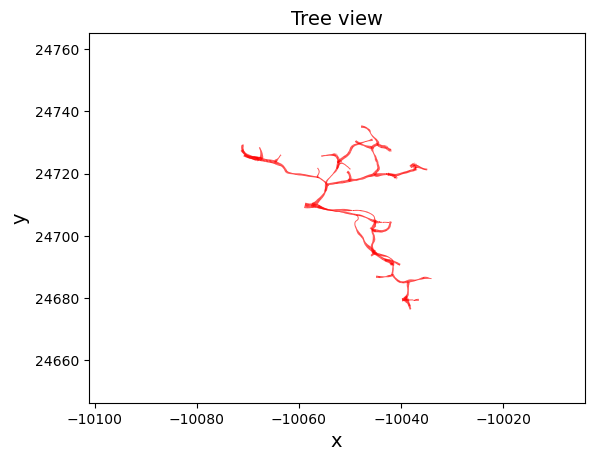

In [19]:
tree(tr = tree1)

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Tree view'}, xlabel='x', ylabel='y'>)

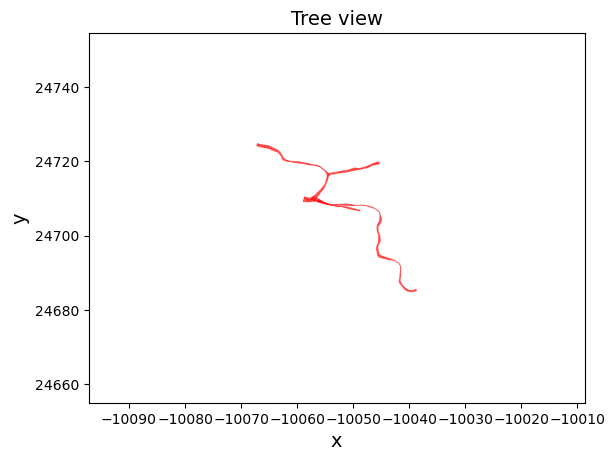

In [53]:
tree2 = subsample_tree(tree1, type=['cut', 3])
tree(tr = tree2)

In [ ]:
def get_way_to_root(tree, sec_id=0):
    """Return way to root."""
    way = []
    tmp_id = sec_id

    while tmp_id != -1:
        way.append(tree.p[tmp_id])
        tmp_id = tree.p[tmp_id]

    return way